In [1]:
import tess_cpm
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.wcs import WCS

In [2]:
f = "exoplanets/tess-s0010-1-1_173.957400_-29.156000_100x100_astrocut.fits"

In [3]:
exo = tess_cpm.CPM(tess_cpm.TargetData(f))

WCS Info could not be retrieved
Removing 154 bad data points (out of 1211) using the TESS provided QUALITY array


In [4]:
exo.set_target_exclusion_predictors(50, 50)

Performing 10-fold cross validation.
1/10
2/10
3/10
4/10


/home/soichiro/miniconda3/envs/daily/lib/python3.7/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/soichiro/miniconda3/envs/daily/lib/python3.7/site-packages/numpy/core/_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/soichiro/miniconda3/envs/daily/lib/python3.7/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


5/10
6/10
7/10
8/10


/home/soichiro/miniconda3/envs/daily/lib/python3.7/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/soichiro/miniconda3/envs/daily/lib/python3.7/site-packages/numpy/core/_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/soichiro/miniconda3/envs/daily/lib/python3.7/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


9/10


/home/soichiro/miniconda3/envs/daily/lib/python3.7/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/soichiro/miniconda3/envs/daily/lib/python3.7/site-packages/numpy/core/_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/soichiro/miniconda3/envs/daily/lib/python3.7/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


10/10


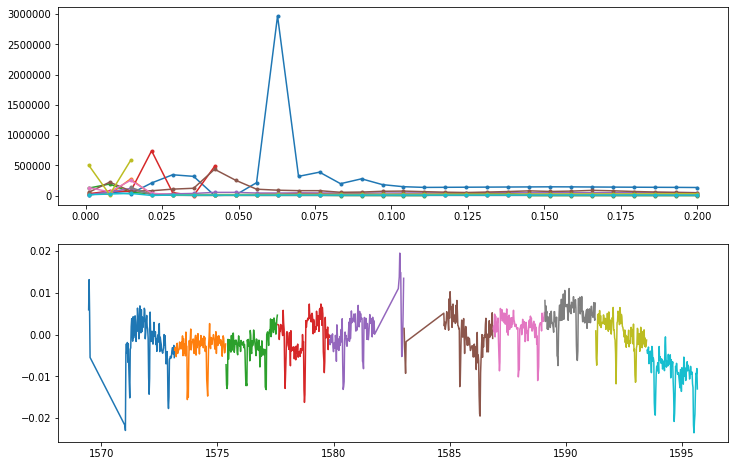

In [5]:
exo.get_hyperparameters(transit_duration=100)

In [6]:
exo = tess_cpm.CPM(f, remove_bad=True)

TypeError: __init__() got an unexpected keyword argument 'remove_bad'

In [ ]:
exo.set_poly_model(1, 4, 0.5)
exo.set_target(50, 50)
exo.set_exclusion(10)
exo.set_predictor_pixels(256)

In [ ]:
exo.lsq(1.0, rescale=True, polynomials=False)

In [ ]:
tess_cpm.summary_plot(exo, 20, save=True)

In [ ]:
exo.sigma_clip_process(2.3)

In [ ]:
tess_cpm.summary_plot(exo, 20, subtract_polynomials=False)

In [ ]:
plt.figure(figsize=(15, 6))
# plt.plot(exo.time, exo.rescaled_target_fluxes, ".-", color="black")
diff = exo.rescaled_target_fluxes - exo.lsq_prediction
plt.plot(exo.time[exo.valid], diff[exo.valid], ".-", color="C0");
# plt.plot(exo.time, diff, ".-", color="C3")
plt.plot(exo.time[~exo.valid], diff[~exo.valid], "x", color="gray")

In [ ]:
plt.figure(figsize=(15, 6))
# plt.plot(exo.time, exo.rescaled_target_fluxes, ".-", color="black")
diff = exo.rescaled_target_fluxes - exo.lsq_prediction
# plt.plot(exo.time[exo.valid], diff[exo.valid], ".-", color="C0");
plt.plot(exo.time, diff, ".-", color="C0")
# plt.plot(exo.time[~exo.valid], diff[~exo.valid], "x", color="gray")

In [ ]:
from IPython.display import HTML
import matplotlib.animation as animation
exo.entire_image(0.5, rescale=True, polynomials=True)
diff = exo.im_diff
upscaled_diff = exo.pixel_medians*exo.im_diff

fig, axes = plt.subplots(1, 3, figsize=(18, 18))

ims = []
for i in range(0, diff.shape[0], 10):
    im1 = axes[0].imshow(exo.im_fluxes[i], origin="lower", animated=True,
                        vmin=np.percentile(exo.im_fluxes[0], 10), vmax=np.percentile(exo.im_fluxes[0], 90))
    im2 = axes[1].imshow(diff[i], origin="lower", animated=True,
                   vmin=np.percentile(diff, 1), vmax=np.percentile(diff, 99));
    im3 = axes[2].imshow(upscaled_diff[i], origin="lower", animated=True,
                   vmin=np.percentile(upscaled_diff, 1), vmax=np.percentile(upscaled_diff, 99));
    ims.append([im1, im2, im3]);
fig.colorbar(im1, ax=axes[0], fraction=0.046)
fig.colorbar(im2, ax=axes[1], fraction=0.046)
fig.colorbar(im3, ax=axes[2], fraction=0.046)
    
ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,
                                repeat_delay=1000);

HTML(ani.to_jshtml())
